# <center>Numerikus Integrálás</center>
## <center>Összetett érintőformula, trapézformula és Simpson-formula</center>

<br>
<b>Példa.</b> Tekintsük az alábbi 

$$I(f)=\int_{4}^{5.2}\ln(x)\text{d}x$$

integrált. Közelítsük $I(f)$ értékét 

+ $6$ részintervallumra támaszkodó összetett trapézformulával: $I_{T,6}(f)$
+ $3$ részintervallumra támaszkodó összetett Simpson-formulával: $I_{S,3}(f)$

Becsüljük meg az egyes közelítések hibáját is!

In [2]:
a = 4; b = 5.2;
m = 6;
h = (b-a)/m;
x = [a:h:b]

x =

   4.0000   4.2000   4.4000   4.6000   4.8000   5.0000   5.2000



In [5]:
kvadratura(4,5.2,6,'log(x)','erinto')
kvadratura(4,5.2,6,'log(x)','trapez') % Trapez eseten m = m
kvadratura(4,5.2,6,'log(x)','Simpson') % Simspon eseten itt 2*m-et kell megadni


A feladat megoldasa 6 intervallumon erintoszaballyal tortent.
ans =  1.827943529349786

A feladat megoldasa 6 intervallumon trapezszaballyal tortent.
ans =  1.827655138682034

A feladat megoldasa 3 Simpson-szaballyal tortent.
ans =  1.827847257950486


In [6]:
%% Osszetett Trapez hibaja
M_2 = 1/16
trapez_hiba = ((b-a)^3/(12*m^2))*M_2

%% Osszetett Simpson hibaja
M_4 = 3/128
simpson_hiba = ((b-a)^5/(2880*(m/2)^4))*M_4

M_2 =    6.250000000000000e-02
trapez_hiba =    2.500000000000001e-04
M_4 =    2.343750000000000e-02
simpson_hiba =    2.500000000000001e-07


<br>
<b>Példa.</b> Hány részintervallumra kell osztani a $[0,\ \pi/4]$ intervallumot, ha az 

$$I(f)=\int_{0}^{\pi/4}\ln(\cos(x))\text{d}x$$

integrál értékét összetett trapézformulával szeretnénk közelíteni úgy, hogy a hiba (felhasználó által előírt tolerancia TOL) értéke kisebb legyen, mint $0.5\cdot 10^{-2}$?

In [34]:
a = 0; b = pi/4; 
TOL = 0.5 * 1e-2;
M_2 = 2;
% Hiba ((b-a)^3/(12*m^2))*M_2 < TOL

m = sqrt((((b-a)^3/(12))*M_2)/TOL)
m = ceil(m)

m =  4.01859458488364
m =  5



## <center>Gauss-kvadratúrák és adaptív kvadratúrák</center>

<br>
<b>Példa.</b> Tekintsük Kahaner híres kvadratúra teszt gyűteményéből a 21-es számút, azaz

$$I(f)=\int_{0}^{1}\frac{1}{\cosh^2(10x-2)}+\frac{1}{\cosh^4(100x-40)}+\frac{1}{\cosh^6(1000x-600)}$$


A feladat pontos értéke $30$ tizedesjegyig

$$I(f)=0.210802735500549277375643255709$$

Nézzük meg, hogy mi történik, hogya $m$ intervallumra osztással dolgozunk összetett Simpson-formula esetén vagy legfeljebb $m$ intervallumot használunk adaptív Gauss-kvadratúra esetén.

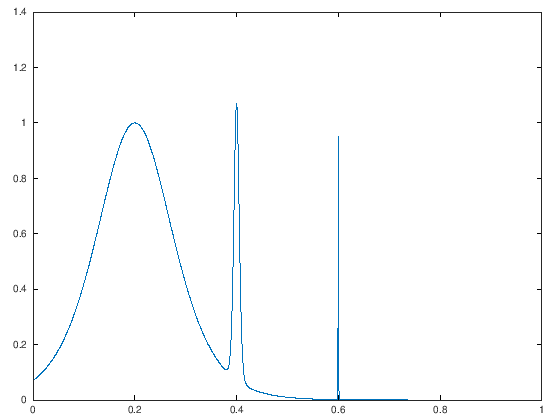

In [75]:
x = linspace(0,1,3000);
f = 1./((cosh(10*x-2)).^2) + 1./((cosh(100*x-40)).^4) + 1./((cosh(1000*x-600)).^6);
plot(x,f)

In [120]:
m = 100000;
% Simpson 
kvadratura(0,1,2*m,'1./((cosh(10*x-2)).^2) + 1./((cosh(100*x-40)).^4) + 1./((cosh(1000*x-600)).^6)','Simpson')


%Adaptiv Gauss-Konrod kvadratura
%adaptiv_gauss_konrod = quadgk (@(x) 1./((cosh(10*x-2)).^2) + 1./((cosh(100*x-40)).^4) + 1./((cosh(1000*x-600)).^6), 0, 1, "MaxIntervalCount", m)


A feladat megoldasa 100000 Simpson-szaballyal tortent.
ans =  0.210802735500549
